# 💳Loan_Default_Prediction_Model💰

---

## Dataset Exploration & Problem Understanding

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [64]:
df=pd.read_csv('/content/loanTrain.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [65]:
df.shape

(614, 13)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [67]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [68]:
# making a list of numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print('Numerical columns: ', num_cols)

# making a list of categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print('Categorical columns: ', cat_cols)

Numerical columns:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical columns:  ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


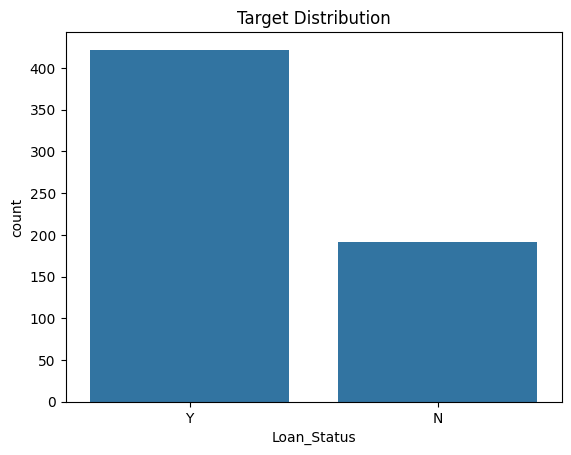

In [69]:
# Target distribution (how balanced it is)
sns.countplot(x='Loan_Status', data=df)
plt.title('Target Distribution')
plt.show()

## Data Cleaning

In [70]:
# identifying missing values
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [71]:
# dropping the Loan_ID column
df.drop('Loan_ID', axis=1, inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


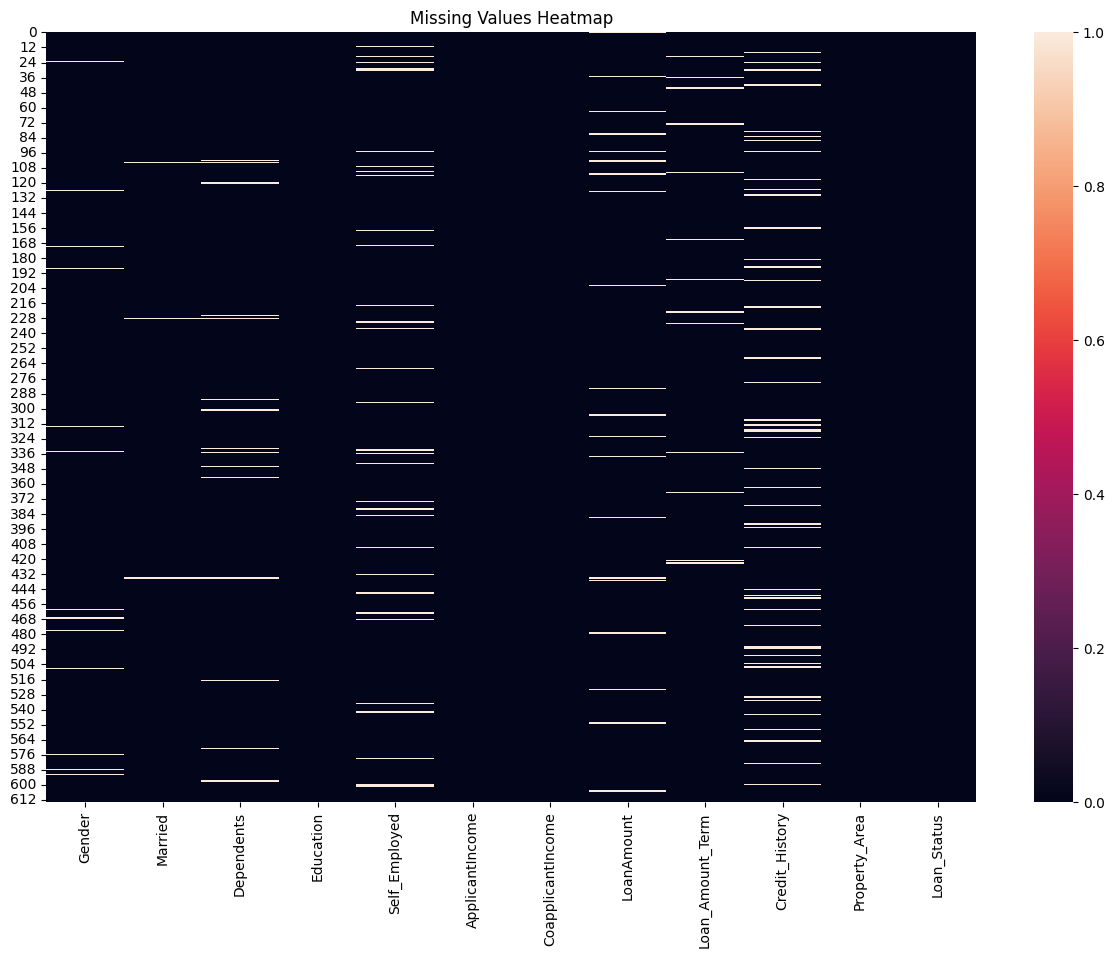

In [72]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull())
plt.title('Missing Values Heatmap')
plt.show()

In [73]:
# Filling in missing values

df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


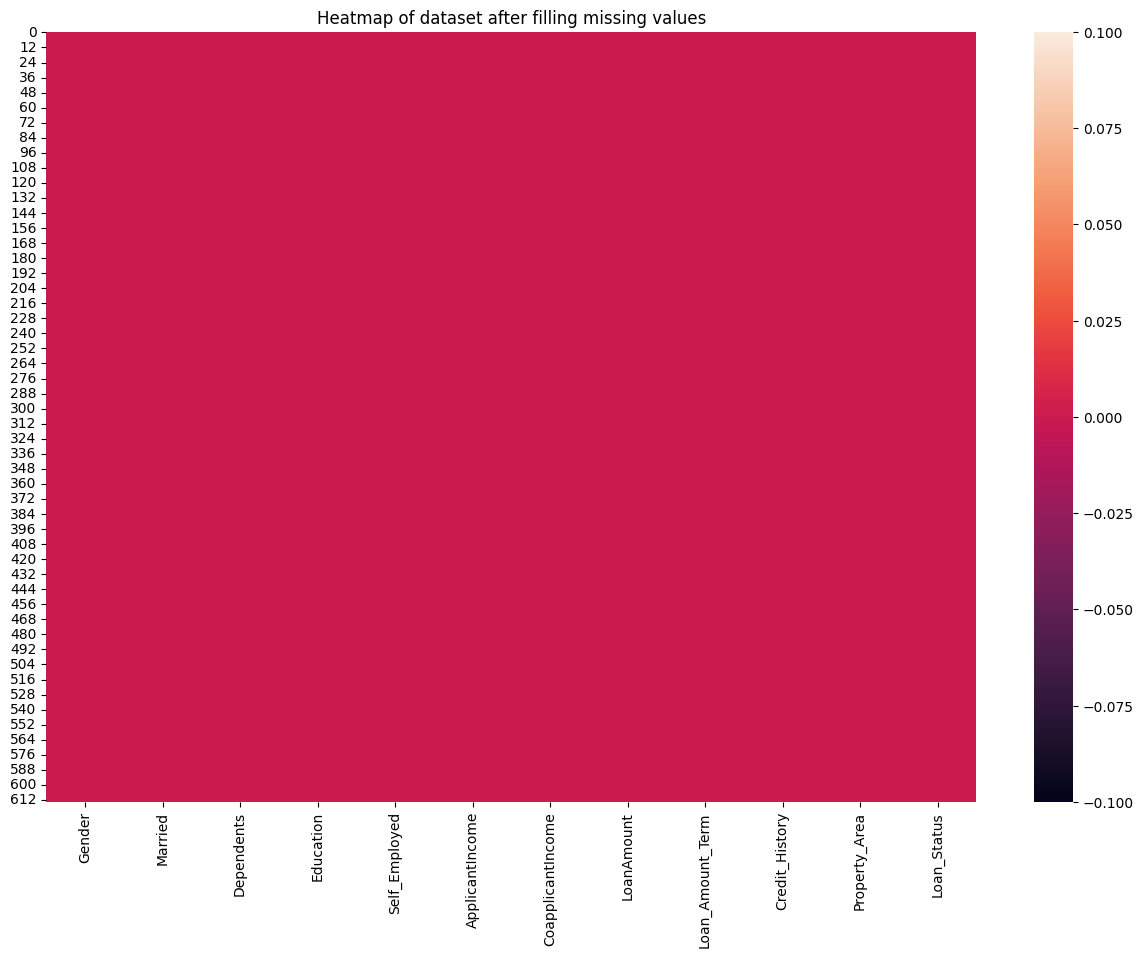

In [74]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull())
plt.title('Heatmap of dataset after filling missing values')
plt.show()

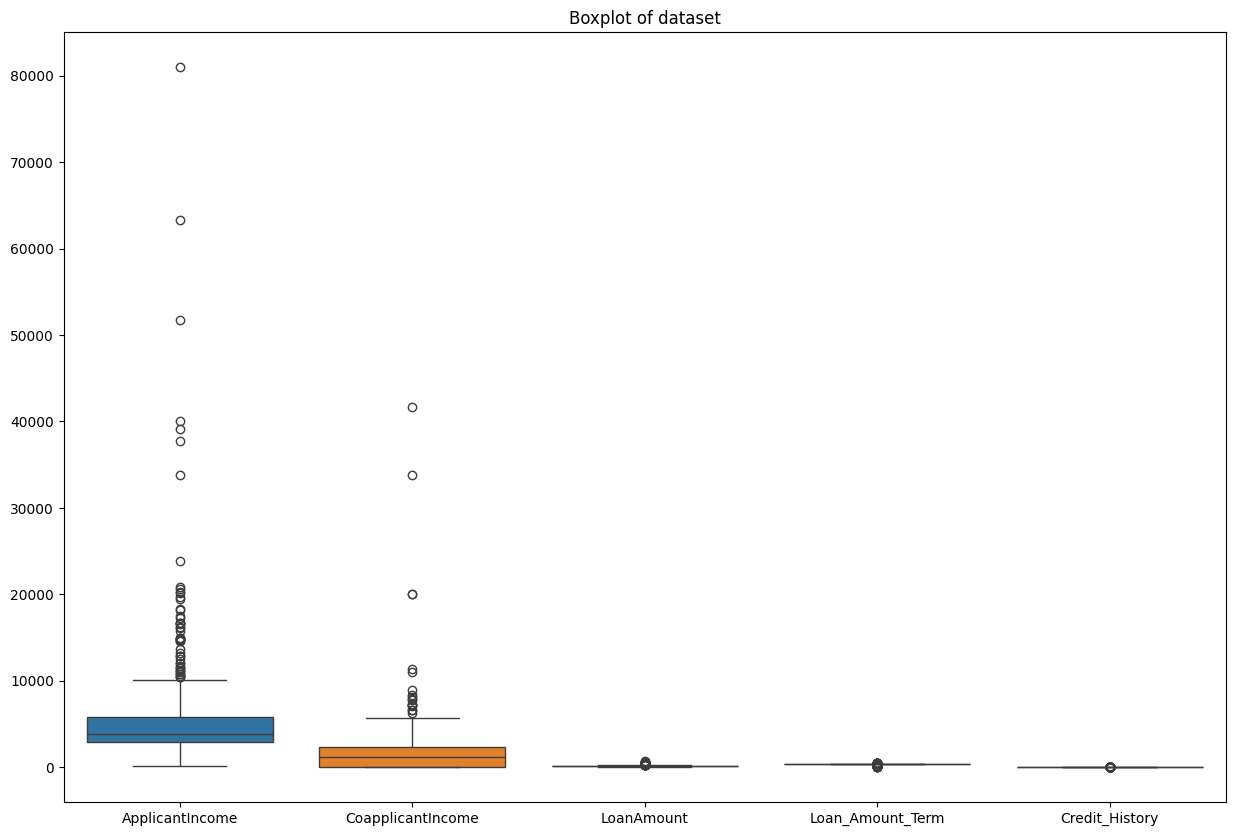

In [75]:
# Check for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Boxplot of dataset')
plt.show()

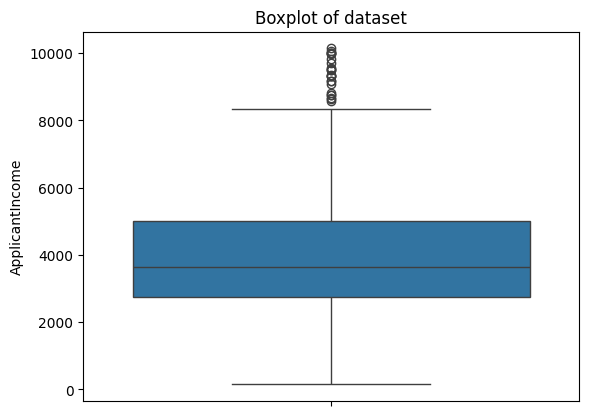

In [76]:
# removing outliers in ApplicantIncome
q1 = df['ApplicantIncome'].quantile(0.25)
q3 = df['ApplicantIncome'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)]


sns.boxplot(data=df['ApplicantIncome'])
plt.title('Boxplot of dataset')
plt.show()

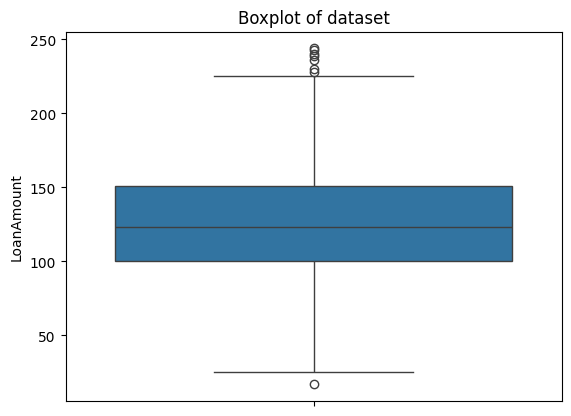

In [77]:
# removing Outliers in LoanAmount
q1 = df['LoanAmount'].quantile(0.25)
q3 = df['LoanAmount'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['LoanAmount'] >= lower_bound) & (df['LoanAmount'] <= upper_bound)]


sns.boxplot(data=df['LoanAmount'])
plt.title('Boxplot of dataset')
plt.show()

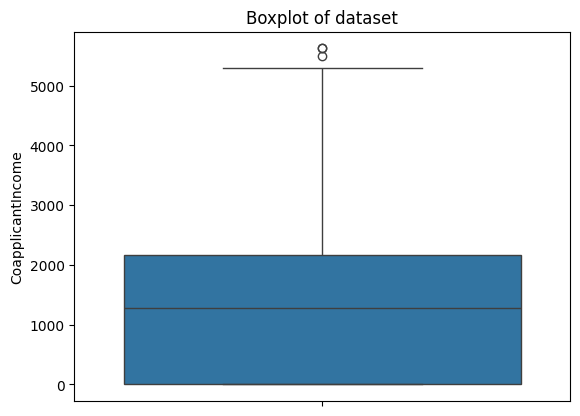

In [78]:
# removing outlietrs in CoapplicantIncome
q1 = df['CoapplicantIncome'].quantile(0.25)
q3 = df['CoapplicantIncome'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['CoapplicantIncome'] >= lower_bound) & (df['CoapplicantIncome'] <= upper_bound)]


sns.boxplot(data=df['CoapplicantIncome'])
plt.title('Boxplot of dataset')
plt.show()

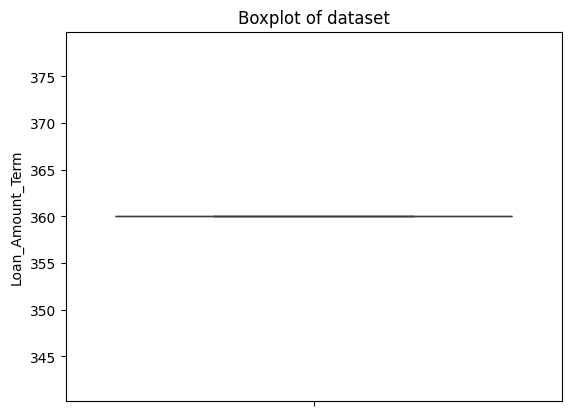

In [79]:
# removing outliers in Loan_Amount_Term
q1 = df['Loan_Amount_Term'].quantile(0.25)
q3 = df['Loan_Amount_Term'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['Loan_Amount_Term'] >= lower_bound) & (df['Loan_Amount_Term'] <= upper_bound)]


sns.boxplot(data=df['Loan_Amount_Term'])
plt.title('Boxplot of dataset')
plt.show()

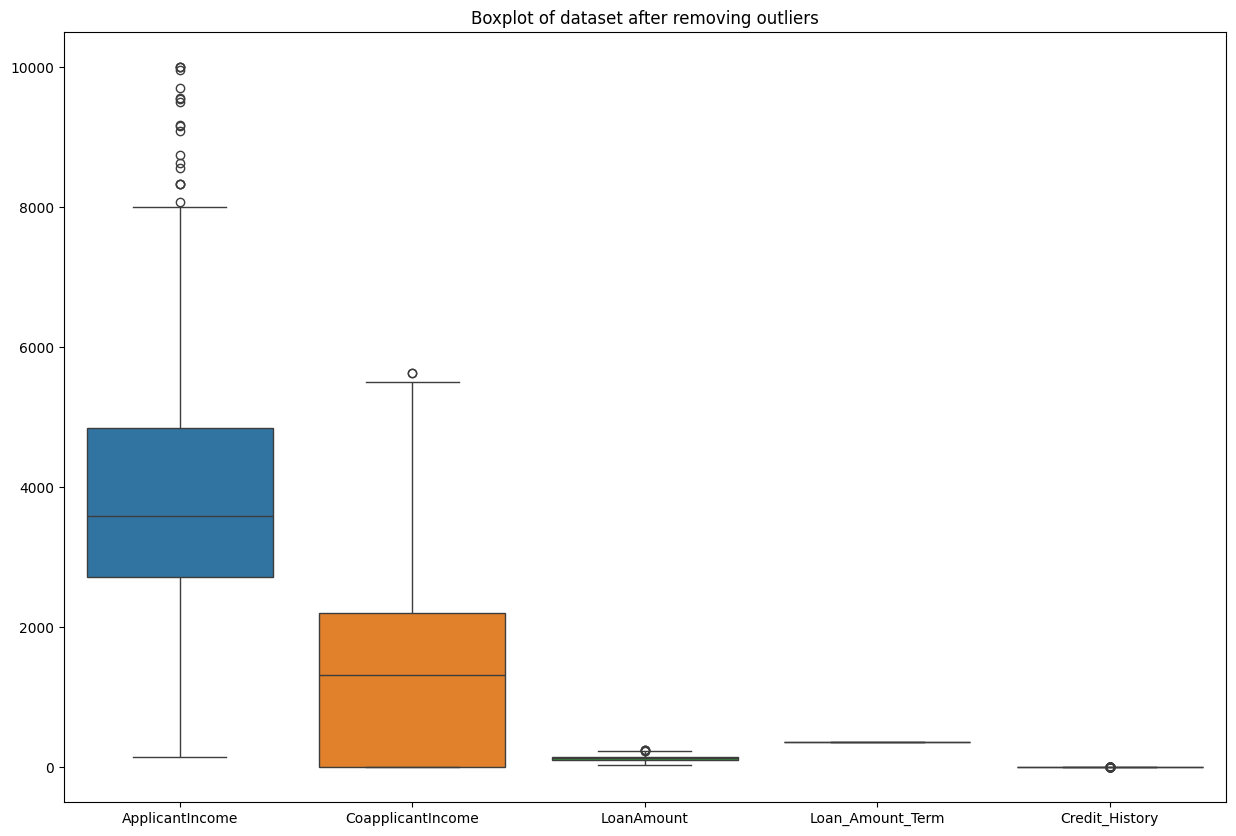

In [80]:
# Check for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Boxplot of dataset after removing outliers')
plt.show()

## Feature Engineering

In [81]:
df['Dependents'].value_counts()

,count
Dependents,
0,278
2,75
1,66
3+,29


In [82]:
# replacing 3+ with 4
df['Dependents'] = df['Dependents'].replace('3+', 4)
df['Dependents'].value_counts()

,count
Dependents,
0,278
2,75
1,66
4,29


In [83]:
# converting categorical columns to numeric
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Property_Area'] = df['Property_Area'].map({'Urban': 2, 'Semiurban': 1, 'Rural': 0})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
6,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1
7,1,1,4,1,0,3036,2504.0,158.0,360.0,0.0,1,0
8,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,2,1
10,1,1,2,1,0,3200,700.0,70.0,360.0,1.0,2,1
11,1,1,2,1,0,2500,1840.0,109.0,360.0,1.0,2,1


In [84]:
# seperating the label and predictors
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y,random_state=2)

In [85]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(403, 11)
(45, 11)
(403,)
(45,)


In [86]:
classifier=svm.SVC(kernel='linear')
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [87]:
# model Evaluation
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy score of the training data : ', training_data_accuracy*100)

Accuracy score of the training data :  82.6302729528536


In [88]:
# accuracy on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score of the test data : ', test_data_accuracy*100)

Accuracy score of the test data :  86.66666666666667


In [92]:
# Making a prediction system for loan approval

# Example input data for a new loan application
# Format: (Gender, Married, Dependents, Education, Self_Employed,
#          ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term,
#          Credit_History, Property_Area)
input_data = (1, 1, 4, 1, 0, 3036, 2504.0, 158.0, 360.0, 0.0,1)

# Convert input data to numpy array
input_array = np.asarray(input_data)

# Reshape the data as the model expects a 2D array for prediction
input_reshaped = input_array.reshape(1, -1)

# Make prediction
prediction = classifier.predict(input_reshaped)

# Interpret and print the prediction result
if prediction[0] == 0:
    print('The loan is NOT approved.')
else:
    print('The loan is APPROVED.')


The loan is APPROVED.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [94]:
print("""
Loan Approval Prediction Model Input Note:

- The model predicts loan approval based on learned patterns from training data.
- The original dataset label (Loan_Status) for an input may differ from model prediction,
  as the model generalizes and may classify borderline cases differently.
- Ensure input features are preprocessed and encoded exactly as in training (correct order,
  encoding, and scaling if applied) before prediction.
- Some prediction mismatch with dataset labels is normal due to model limitations.
- For accurate predictions, replicate the exact preprocessing pipeline on all inputs.
""")



Loan Approval Prediction Model Input Note:

- The model predicts loan approval based on learned patterns from training data.
- The original dataset label (Loan_Status) for an input may differ from model prediction,
  as the model generalizes and may classify borderline cases differently.
- Ensure input features are preprocessed and encoded exactly as in training (correct order,
  encoding, and scaling if applied) before prediction.
- Some prediction mismatch with dataset labels is normal due to model limitations.
- For accurate predictions, replicate the exact preprocessing pipeline on all inputs.

